In [1]:
library(janitor)
library(ggpubr)
library(knitr)
library(ggplot2)
library(ggsci)
library(knitr)
library(performance)
library(lme4)
library(emmeans)
library(dplyr)
library(purrr)
library(tibble)
library(MuMIn)
library(here)
library(reactablefmtr)
library(emmeans)
library(car)
library(ggplot2)
library(modelr)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: ggplot2

Loading required package: Matrix


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


here() starts at /home/ecamo19/Documents/projects/nutrients_and_water_effects_2022/shade_house_reproducible_stats

Loading required package: reactable


Attaching package: ‘reactablefmtr’


The following object is masked from ‘package:ggplot2’:

    margin


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:purrr’:

    some


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘modelr’


The following objects are masked from ‘package:performance’:

    mae, mse, rmse




In [65]:
setwd(here::here())

In [66]:
# Load all joined dataset
source("./scripts/code_clean_data_soil_moisture.R")
source("./scripts/code_join_data_full_dataset.R")

tibble [1,536 × 7] (S3: tbl_df/tbl/data.frame)
 $ id            : int [1:1536] 5 5 6 6 7 7 8 8 9 9 ...
 $ spcode        : Factor w/ 8 levels "dr","ec","gs",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ treatment     : Factor w/ 4 levels "Ambient Rain",..: 1 1 1 1 1 1 1 1 4 4 ...
 $ nfixer        : Factor w/ 2 levels "fixer","nonfixer": 1 1 1 1 1 1 1 1 1 1 ...
 $ date_day_month: Factor w/ 6 levels "31-August","19-September",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sm_measured   : Factor w/ 2 levels "Before applying the treatments",..: 1 2 1 2 1 2 1 2 1 2 ...
 $ soil_moisture : num [1:1536] 31.5 21.9 25.8 25.4 26.5 25.8 29 22.5 30.3 28.8 ...


In [77]:
# Load custom made functions

## Inference
source("./R/functions_models.R")
source("./R/function_for_inference_anova_table.R")
source("./R/function_for_inference_tukey_tables.R")
source("./R/function_for_inference_emmeans_and_percentage_diff.R")



## Plots
source("./R/function_plots.R")
source("./R/function_validation_plots.R")


In [68]:
# set plot dimensions
options(repr.plot.width = 25)
options(repr.plot.height = 10)

__For running each peice of code press shift + Enter__

# Soil moisture figures

In [69]:
data_soil_moisture_cleaned %>%
	group_by(treatment,nfixer,date_day_month,sm_measured ) %>%

	summarise(mean_sm = mean(soil_moisture),
			  sd_sm   = sd(soil_moisture)) %>%

    arrange(nfixer) %>%
	arrange(date_day_month) %>%
	kable()

`summarise()` has grouped output by 'treatment', 'nfixer', 'date_day_month'.
You can override using the `.groups` argument.




|treatment                             |nfixer   |date_day_month |sm_measured                    |   mean_sm|     sd_sm|
|:-------------------------------------|:--------|:--------------|:------------------------------|---------:|---------:|
|Ambient Rain                          |fixer    |31-August      |Before applying the treatments | 33.183333|  5.576384|
|Ambient Rain                          |fixer    |31-August      |After applying the treatments  | 26.541667|  5.094821|
|Ambient Rain plus Nutrients           |fixer    |31-August      |Before applying the treatments | 29.708333|  8.483187|
|Ambient Rain plus Nutrients           |fixer    |31-August      |After applying the treatments  | 23.475000|  9.609477|
|Ambient Rain plus Water               |fixer    |31-August      |Before applying the treatments | 32.533333|  6.689250|
|Ambient Rain plus Water               |fixer    |31-August      |After applying the treatments  | 29.100000|  3.636432|
|Ambient Rain plus Nutrients a

## Boxplots

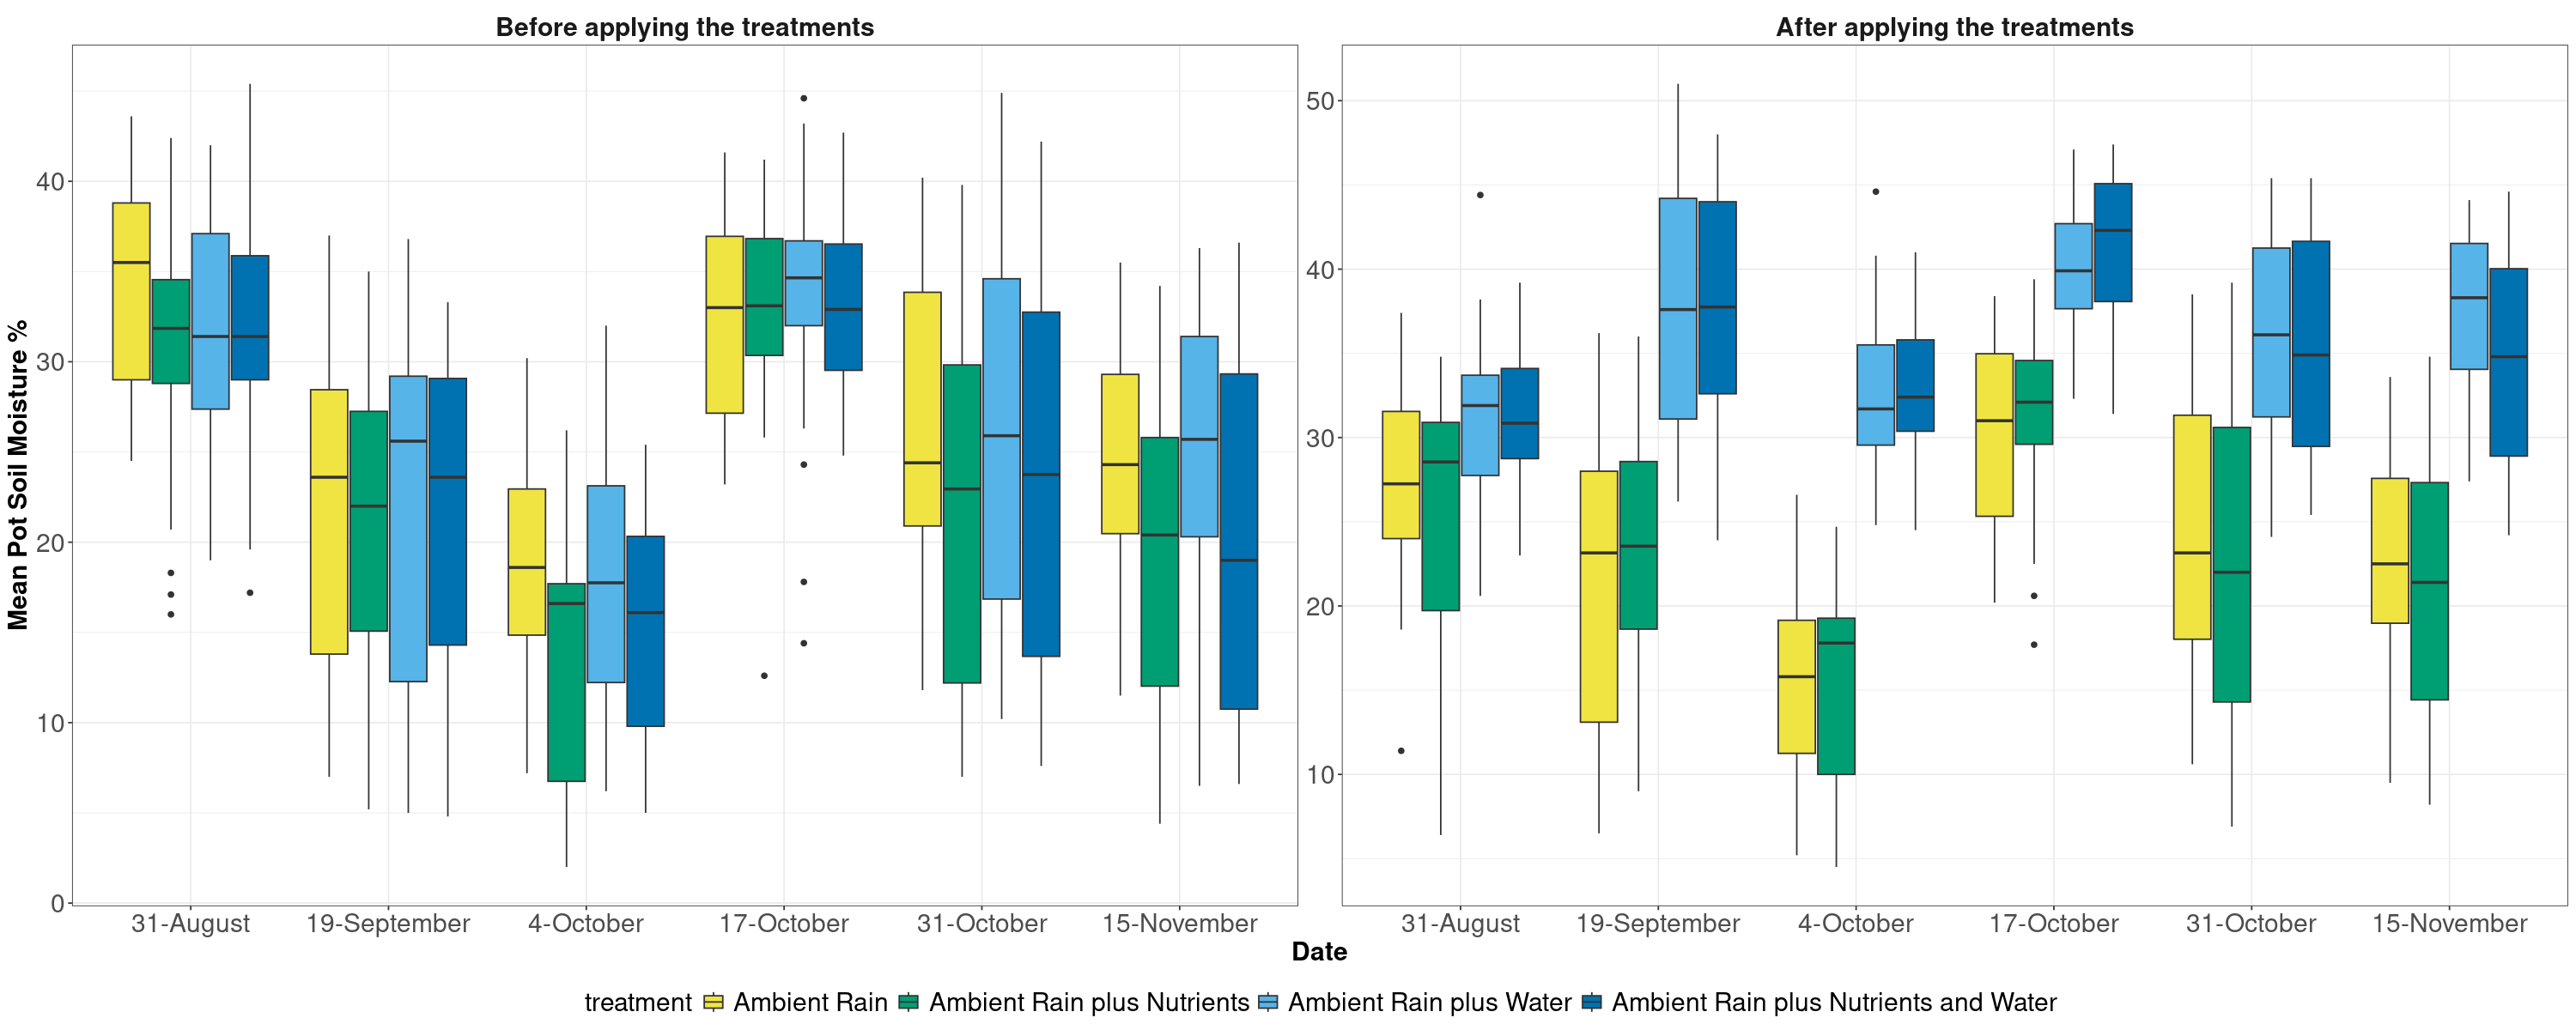

In [70]:
ggplot(data = data_soil_moisture_cleaned,
	   aes(x = date_day_month, y = soil_moisture,
	   	   fill = treatment)) +
	#facet_wrap(~treatment,nrow = 4, scales = "free_y") +

	#Adjust boxplots side by side
	geom_boxplot(position = position_dodge(width=.8)) +
	theme_bw() +

    facet_wrap(~ sm_measured, scales = "free_y") +
		#Define colors
	#scale_colour_manual(values = c("#F0E442","#0072B2"))+
	xlab("Date") + ylab("Mean Pot Soil Moisture %") +

	#Delete lines around facet labels
	theme(strip.background = element_rect( color="white", fill="white"),

     #Font size
     axis.text = element_text(size = 18),
     axis.title = element_text(size = 18,face = "bold"),
     strip.text.x = element_text(size = 18,face = "bold"),

     # Legend position and size
     legend.position = "bottom",
     legend.title = element_text(size = 18),
     legend.text = element_text(size = 18)) +
	 guides(col = guide_legend(ncol = 1,
	 						  title.position = "left",
	 						  title.hjust = .59,
	 						  title = "Soil Moisture Measuared:")
	 	   ) +
    ggplot2::scale_fill_manual(values = c("#F0E442","#009E73",
                                              "#56B4E9","#0072B2"))

## Mean values + Standard errors

In [71]:
data_soil_moisture_cleaned  %>%
        group_by(date_day_month, sm_measured, treatment) %>%
        summarise(mean_soil_moisture = mean(soil_moisture),

                se_soil_moisture = (sd(soil_moisture) / sqrt(n())))  %>%

        mutate(difference = ((mean_soil_moisture - first(mean_soil_moisture)))) %>%
        filter(sm_measured == "After applying the treatments" &
                treatment %in% c("Ambient Rain plus Water",
                                "Ambient Rain plus Nutrients and Water")) %>%
        kable()

`summarise()` has grouped output by 'date_day_month', 'sm_measured'. You can
override using the `.groups` argument.




|date_day_month |sm_measured                   |treatment                             | mean_soil_moisture| se_soil_moisture| difference|
|:--------------|:-----------------------------|:-------------------------------------|------------------:|----------------:|----------:|
|31-August      |After applying the treatments |Ambient Rain plus Water               |           31.26250|        0.9061144|   4.100000|
|31-August      |After applying the treatments |Ambient Rain plus Nutrients and Water |           31.32812|        0.7427911|   4.165625|
|19-September   |After applying the treatments |Ambient Rain plus Water               |           37.69687|        1.2719483|  16.125000|
|19-September   |After applying the treatments |Ambient Rain plus Nutrients and Water |           37.70625|        1.1995626|  16.134375|
|4-October      |After applying the treatments |Ambient Rain plus Water               |           32.71563|        0.8199886|  17.368750|
|4-October      |After applying 

`summarise()` has grouped output by 'date_day_month', 'sm_measured'. You can
override using the `.groups` argument.


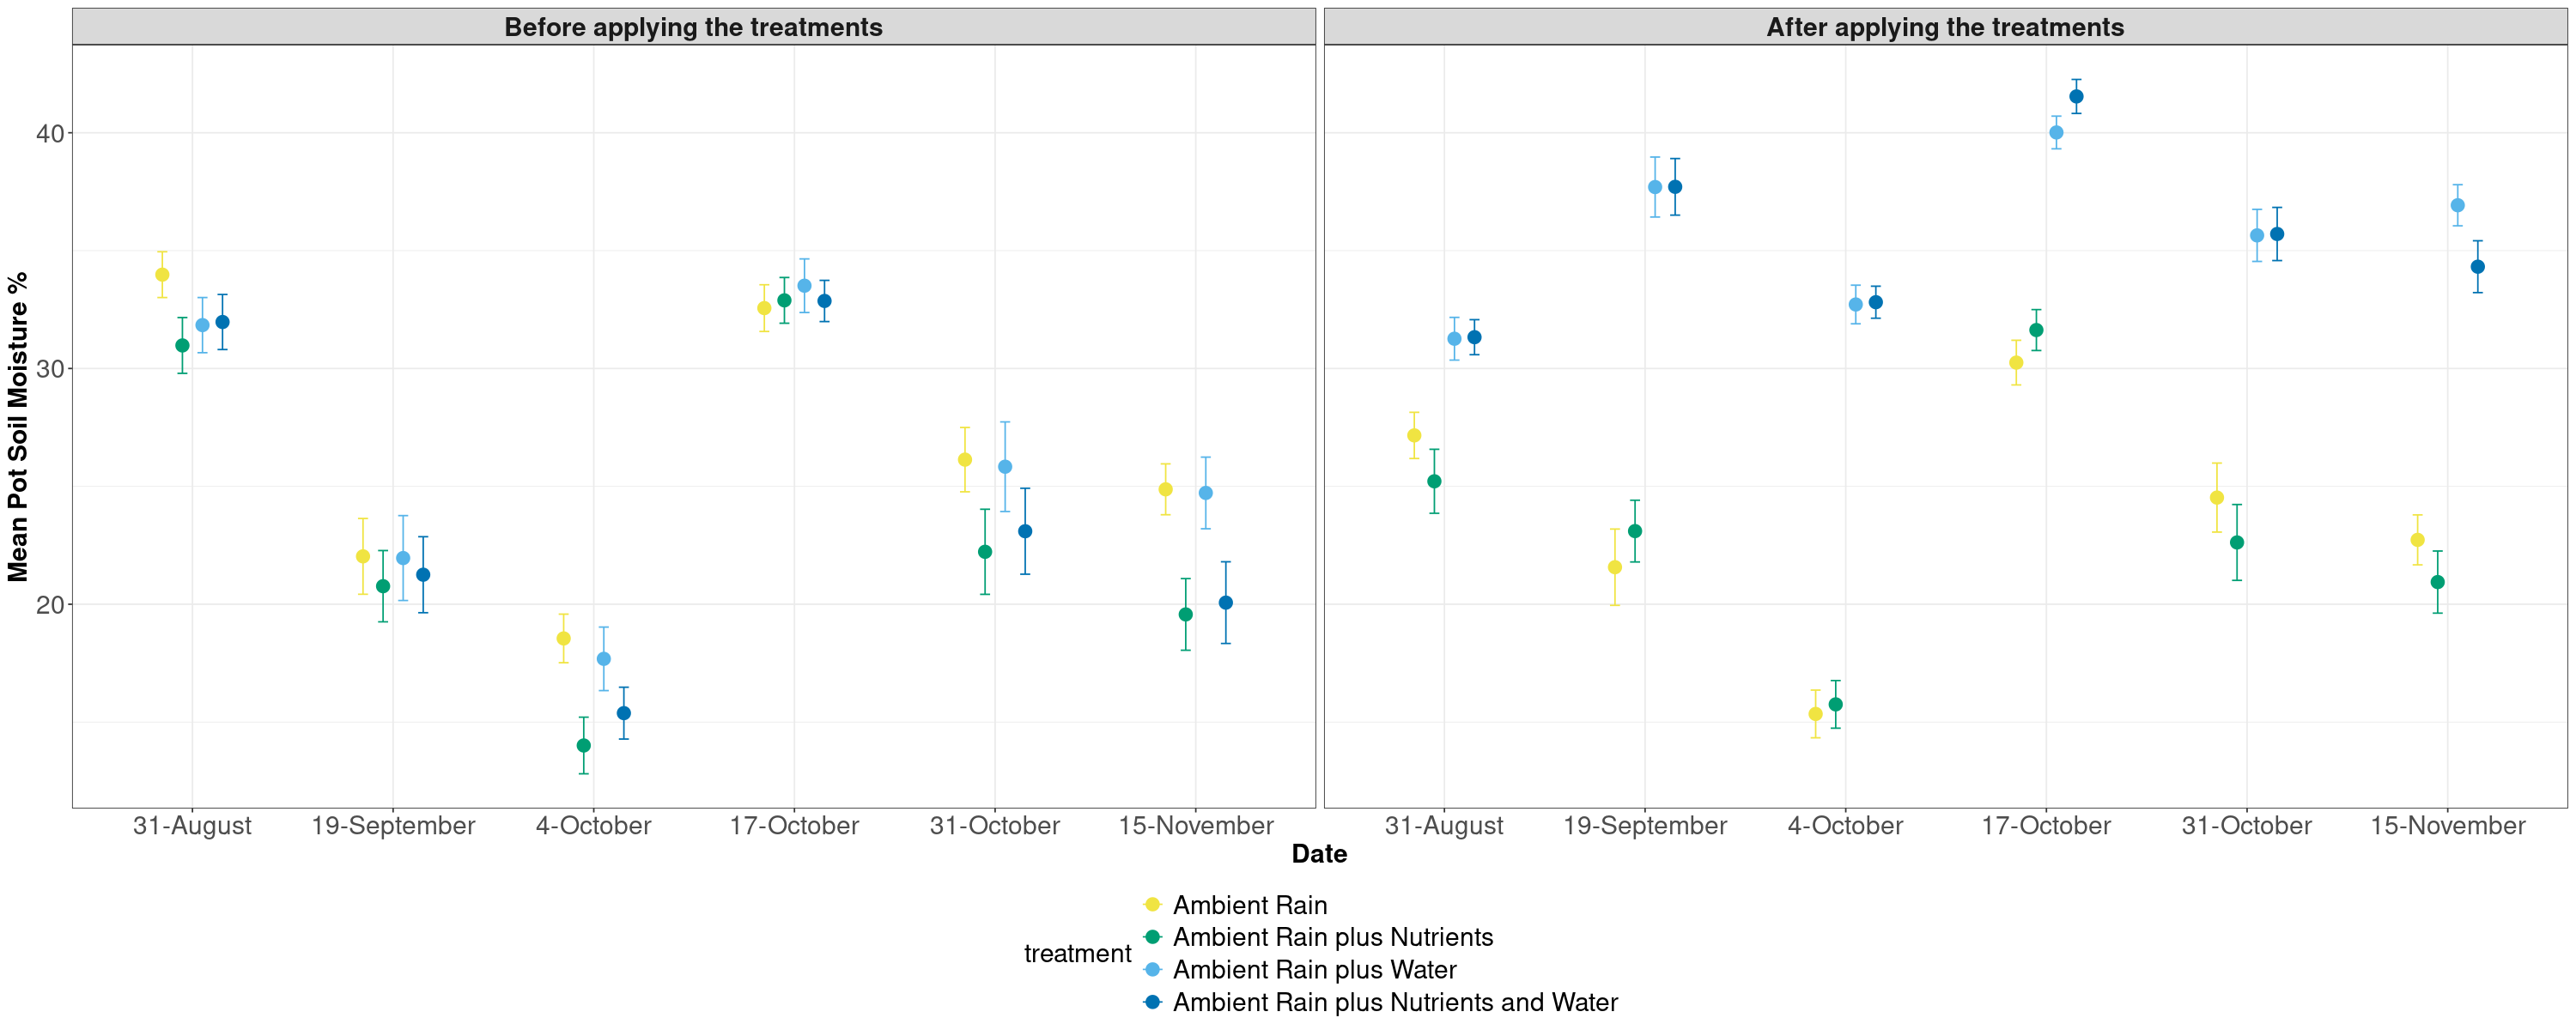

In [72]:
data_soil_moisture_cleaned  %>%
        group_by(date_day_month, sm_measured, treatment) %>%
        summarise(mean_soil_moisture = mean(soil_moisture),

                se_soil_moisture = (sd(soil_moisture) / sqrt(n()))) %>%

        ggplot(data = ., aes(x = date_day_month, y = mean_soil_moisture,
                            color = treatment)) +
            geom_point(position = position_dodge(width = .4), size = 4) +
            facet_wrap(~sm_measured) +

            scale_color_manual(values = c("#F0E442","#009E73", "#56B4E9",
                                            "#0072B2")) +

            xlab("Date") + ylab("Mean Pot Soil Moisture %") +
            theme_bw() +

            # Add Standard error bars
            geom_errorbar(aes(ymin = mean_soil_moisture - se_soil_moisture,
                              ymax = mean_soil_moisture + se_soil_moisture),
                            width = .2,
                            position = position_dodge(width = .4)) +


            #Delete lines around facet labels
	        theme(

                    #Font size
                    axis.text = element_text(size = 18),
                    axis.title = element_text(size = 18, face = "bold"),
                    strip.text.x = element_text(size = 18, face = "bold"),

                    # Legend position and size
                    legend.position = "bottom",
                    legend.title = element_text(size = 18),
                    legend.text = element_text(size = 18)) +
	                guides(col = guide_legend(ncol = 1, title.position = "left",
                            title.hjust = .59))


# Plant's mass fractions figures

In [73]:
data_mass_fractions <-
    data_for_models %>%
    tibble::rownames_to_column("id") %>%
    select(id,spcode, treatment, nfixer, init_height)

## Models

In [74]:
data_for_models <-
  data_for_models %>%

  # Select variables for analysis
  dplyr::select(c(spcode, treatment, nfixer, init_height, rmf, smf, lmf))

In [75]:
# Take response variables names
response_vars_mass_fractions <-
    set_names(c("rmf", "lmf"))


response_vars_mass_fractions

rmf   lmf 
"rmf" "lmf"

In [78]:
models_mass_fractions <- map(response_vars_mass_fractions, ~ mixed_model_1(response = .x,
                  data = data_for_models))


In [81]:
# Log model

## Root-Shoot ratio
model_smf_log <- lmer(log(smf) ~ nfixer*treatment + init_height + (1|spcode),
                         data = data_for_models)

log_model_smf <- list(model_smf_log)

names(log_model_smf) <- "smf_log"

# Append log models to model list
models_mass_fractions <- append(log_model_smf, models_mass_fractions)

In [82]:
names(models_mass_fractions)

[1] "smf_log" "rmf"     "lmf"

## Model Assumptions

### Root Mass fractions

[1] "No variable specified inthe variables argument"


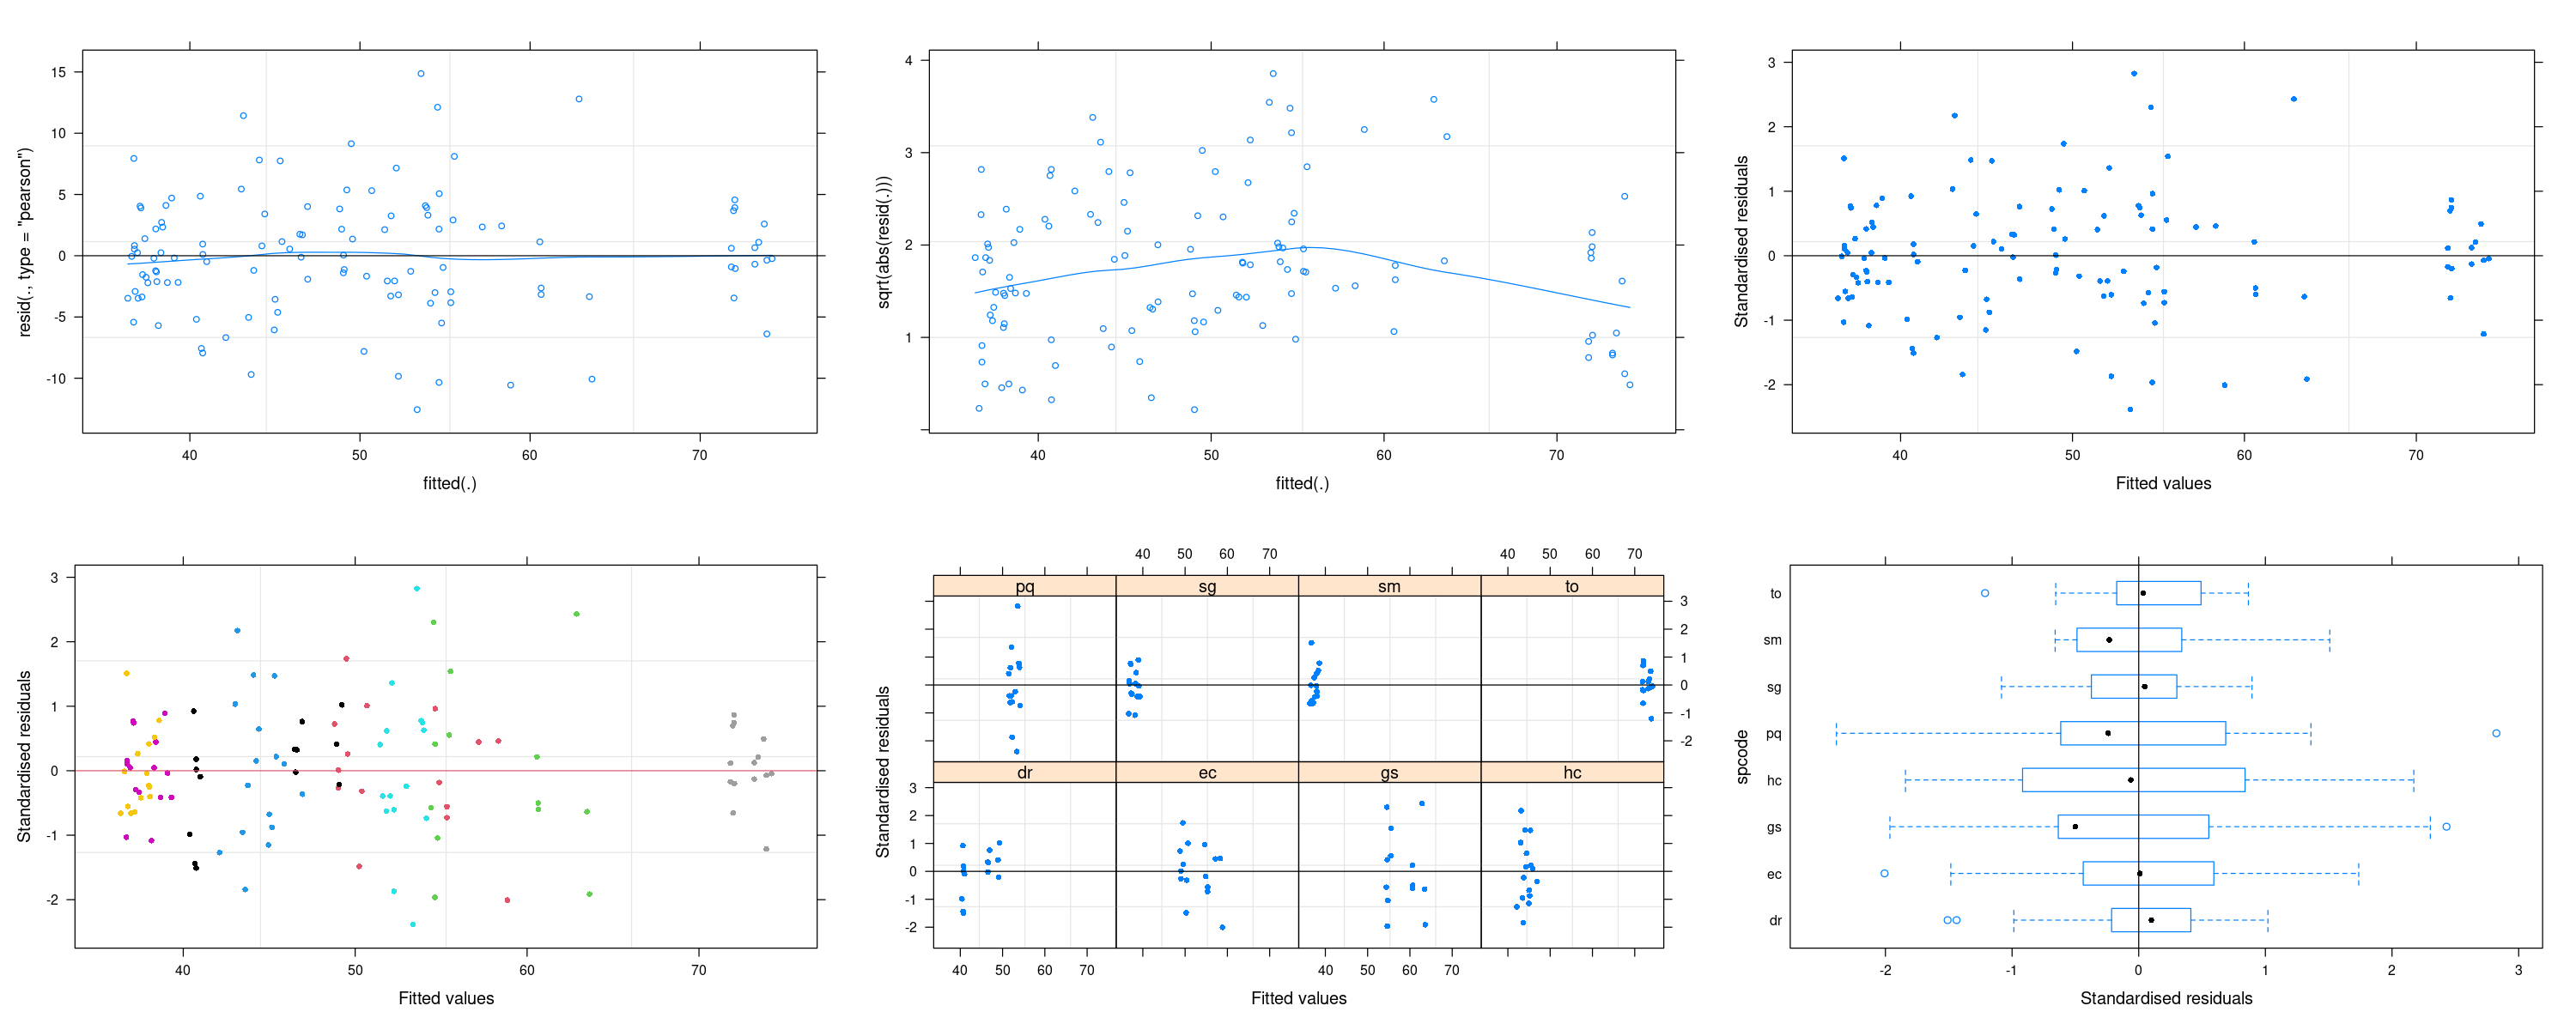

In [83]:
par(mfrow = c(3,3))
validation_plots(models_mass_fractions$rmf,
                data = data_for_models,
                group = "spcode")

### Stem Mass fractions

[1] "No variable specified inthe variables argument"


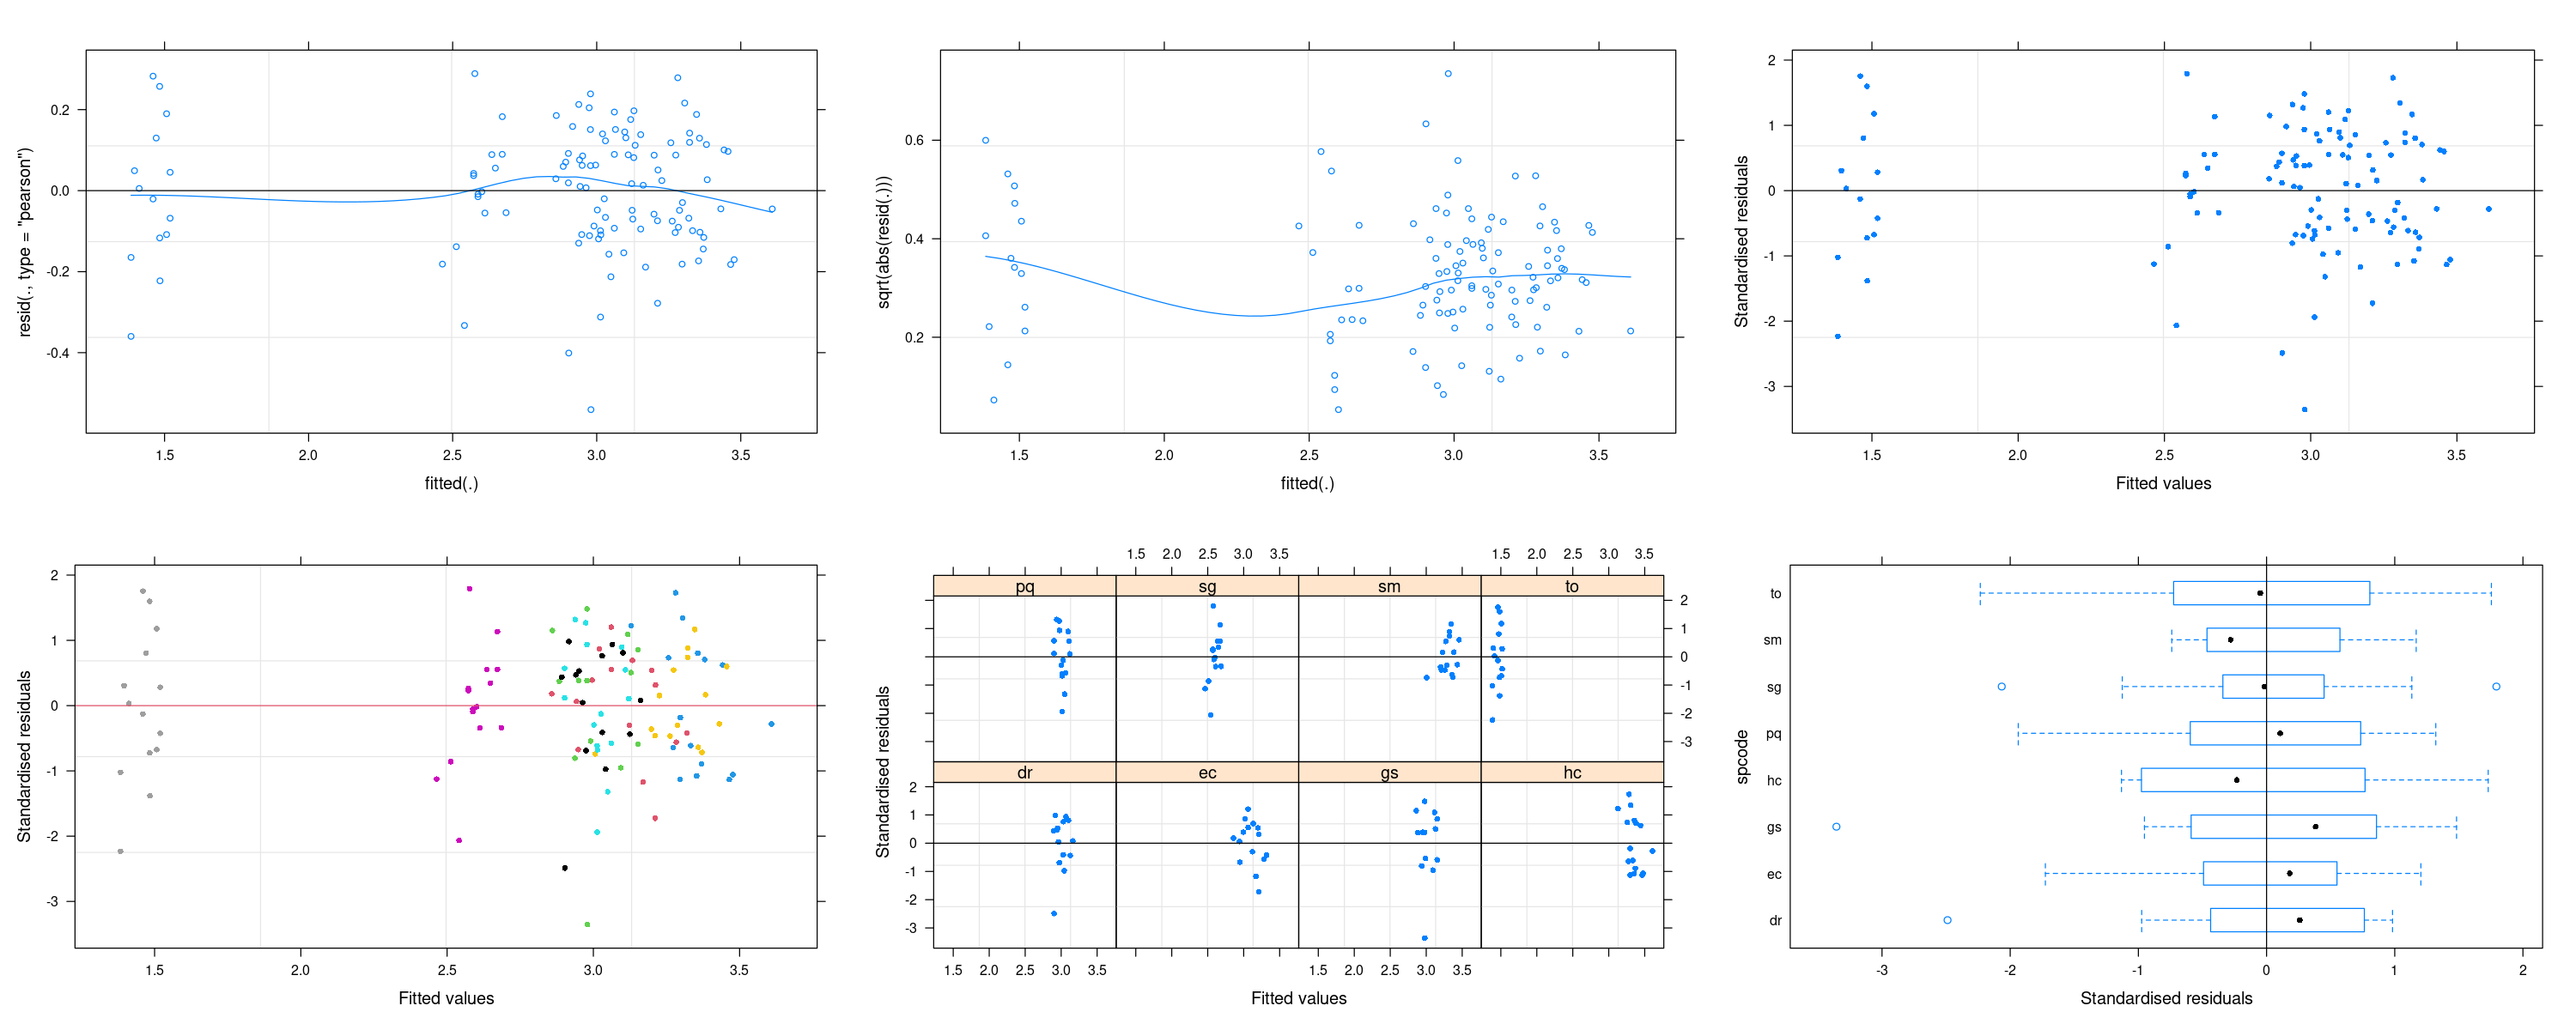

In [84]:
par(mfrow = c(3,3))
validation_plots(models_mass_fractions$smf_log,
                data = data_for_models,
                group = "spcode")

### Leaf Mass fractions

[1] "No variable specified inthe variables argument"


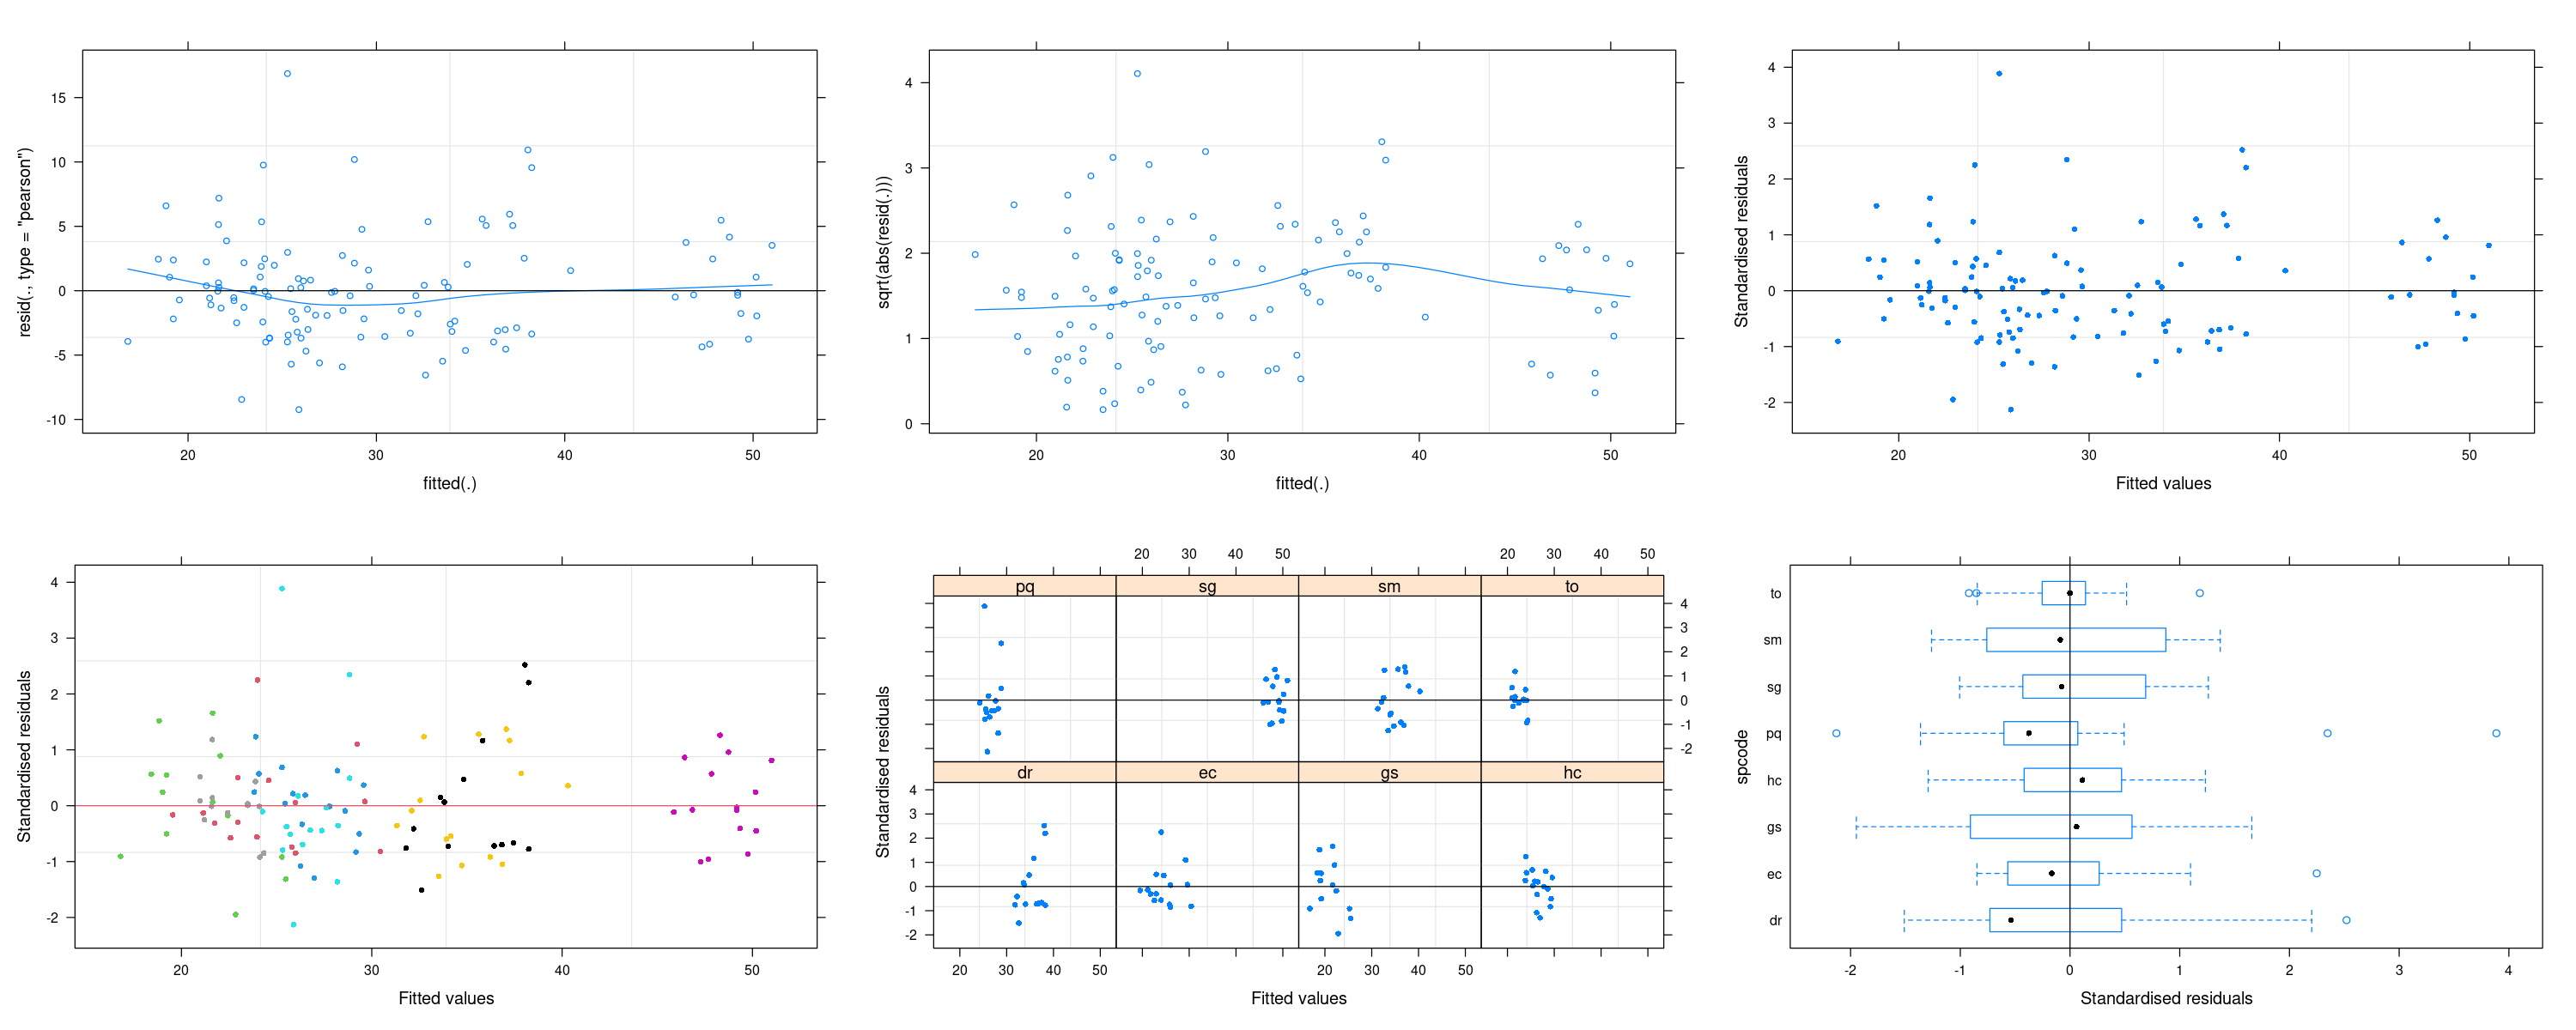

In [85]:
par(mfrow = c(3,3))
validation_plots(models_mass_fractions$lmf,
                data = data_for_models,
                group = "spcode")

## Model inference

In [86]:
## r2 models
models_mass_fractions %>%

    map(., r2) %>%
    unlist() %>%
    kable()



|                                      |         x|
|:-------------------------------------|---------:|
|smf_log.R2_conditional.Conditional R2 | 0.9270657|
|smf_log.R2_marginal.Marginal R2       | 0.1618669|
|rmf.R2_conditional.Conditional R2     | 0.8544378|
|rmf.R2_marginal.Marginal R2           | 0.0428643|
|lmf.R2_conditional.Conditional R2     | 0.8513074|
|lmf.R2_marginal.Marginal R2           | 0.1445339|

### Anova tables

In [87]:
map(models_mass_fractions, ~Anova(.x, type = "III", test.statistic = c("F")))

,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),94.6289765,1,7.365731,1.831805e-05
nfixer,0.4423487,1,6.143997,5.301514e-01
treatment,1.3277415,3,102.065414,2.695146e-01
init_height,19.1818191,1,107.593224,2.768274e-05
nfixer:treatment,0.8572411,3,102.039082,4.659278e-01
,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),71.0560697,1,8.448420,2.150472e-05
treatment,0.6772734,3,102.116865,5.679222e-01


### Post-Hoc: Tukey's test

### Root Mass fractions

In [95]:
as_tibble(emmeans(models_mass_fractions$rmf,
        pairwise ~ nfixer*treatment,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6)) %>%
        kable()



|contrast                                                   |  estimate|       SE|         df|   t.ratio|  p.value|
|:----------------------------------------------------------|---------:|--------:|----------:|---------:|--------:|
|nonfixer no_additions - fixer no_additions                 |  1.354795| 9.291695|   6.275546|  0.145807| 1.000000|
|nonfixer no_additions - nonfixer plus_nutrients            |  1.960798| 1.721798| 102.189726|  1.138808| 0.946559|
|nonfixer no_additions - fixer plus_nutrients               | -6.736453| 9.319351|   6.351021| -0.722846| 0.992508|
|nonfixer no_additions - nonfixer plus_water                |  0.556275| 1.738668| 102.007366|  0.319943| 0.999982|
|nonfixer no_additions - fixer plus_water                   | -4.202671| 9.294216|   6.281418| -0.452181| 0.999566|
|nonfixer no_additions - nonfixer plus_water_nutrients      |  1.936254| 1.665365| 102.019730|  1.162660| 0.940525|
|nonfixer no_additions - fixer plus_water_nutrients         |  1.49743

### Stem Mass fractions

In [98]:
as_tibble(emmeans(models_mass_fractions$smf_log,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6)) %>%
        kable()



|contrast                                                   |  estimate|       SE|         df|   t.ratio|  p.value|
|:----------------------------------------------------------|---------:|--------:|----------:|---------:|--------:|
|no_additions nonfixer - plus_nutrients nonfixer            |  0.064423| 0.052709| 102.107009|  1.222227| 0.923498|
|no_additions nonfixer - plus_water nonfixer                | -0.035125| 0.053221| 102.002867| -0.659975| 0.997812|
|no_additions nonfixer - plus_water_nutrients nonfixer      | -0.022876| 0.050978| 102.010010| -0.448738| 0.999824|
|no_additions nonfixer - no_additions fixer                 | -0.256696| 0.385955|   6.143997| -0.665093| 0.995272|
|no_additions nonfixer - plus_nutrients fixer               | -0.178917| 0.386579|   6.183943| -0.462821| 0.999490|
|no_additions nonfixer - plus_water fixer                   | -0.225548| 0.386013|   6.147392| -0.584302| 0.997812|
|no_additions nonfixer - plus_water_nutrients fixer         | -0.35160

### Leaf Mass fractions

In [109]:
as_tibble(emmeans(models_mass_fractions$lmf,
        pairwise ~ treatment*nfixer,
        adjust = "tukey"
        )$contrast) %>%
        mutate(across(2:6, round, 6)) %>%
        kable()



|contrast                                                   |  estimate|       SE|         df|   t.ratio|  p.value|
|:----------------------------------------------------------|---------:|--------:|----------:|---------:|--------:|
|no_additions nonfixer - plus_nutrients nonfixer            | -2.504530| 1.419448| 102.217859| -1.764440| 0.645193|
|no_additions nonfixer - plus_water nonfixer                |  0.239591| 1.433406| 102.009411|  0.167148| 1.000000|
|no_additions nonfixer - plus_water_nutrients nonfixer      | -2.268450| 1.372969| 102.023481| -1.652222| 0.717437|
|no_additions nonfixer - no_additions fixer                 | -0.090925| 7.100923|   6.325069| -0.012805| 1.000000|
|no_additions nonfixer - plus_nutrients fixer               |  6.560255| 7.125521|   6.413736|  0.920670| 0.972673|
|no_additions nonfixer - plus_water fixer                   |  4.953874| 7.103150|   6.331748|  0.697419| 0.993882|
|no_additions nonfixer - plus_water_nutrients fixer         |  1.72343

### Treatment effects

#### Root Mass fractions

In [115]:
emmeans_table_tidy(models_mass_fractions$rmf,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x64c74c9efa08>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

#### Stem Mass fractions

In [114]:
emmeans_table_tidy(models_mass_fractions$smf_log,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x64c74b55d320>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

### Leaf Mass fractions

In [113]:
emmeans_table_tidy(models_mass_fractions$lmf,
                        formula = "treatment|nfixer",
                        grouping_var = "nfixer")

[1] "Formula for pairwise comparisons: "
pairwise ~ treatment | nfixer
<environment: 0x64c7480c5290>


Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


`mutate_if()` ignored the following grouping variables:
• Column `nfixer`


HTML widgets cannot be represented in plain text (need html)

## Boxplots Biomass partitioning

In [120]:
# Step done for getting predictions from models for Q1
data_for_predictions <-
    data_for_models %>%

        rownames_to_column("id") %>%

        # Remove unused variables
        dplyr::select(id, spcode, treatment, nfixer, init_height)

In [152]:
# Get predictions
string <- c("models_mass_fractions")

data_pred_mass_fractions <-

        # Get models prediction
        modelr::gather_predictions(data_for_predictions,

                           # Return predictions
                            models_mass_fractions$rmf,
                            models_mass_fractions$smf_log,
                            models_mass_fractions$lmf) %>%

        pivot_wider(names_from = model, values_from = pred) %>%
            rename_all(funs(

                # rename columns
                stringr::str_to_lower(.) %>%
                stringr::str_replace(., c(string),"pred_") %>%

                # Remove dollar sing
                gsub("\\$", "", .)
                )) %>%

        # Back transform log variables
        mutate(pred_smf = exp(pred_smf_log)) %>%

        # Remove log predictions and init height
        dplyr::select(-c(init_height, pred_smf_log))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


In [153]:
vars_mass_fractions <-
  crossing(

    # Get all numeric variables to plot (all y)
    as_tibble(t(combn(dplyr::select(data_pred_mass_fractions,
                                    where(is.numeric)) %>% names, 1))),

    # Select factor variables to plot
    x_axis_var = dplyr::select(data_pred_mass_fractions, nfixer) %>%  names,
    group_var = dplyr::select(data_pred_mass_fractions, treatment) %>%  names)

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


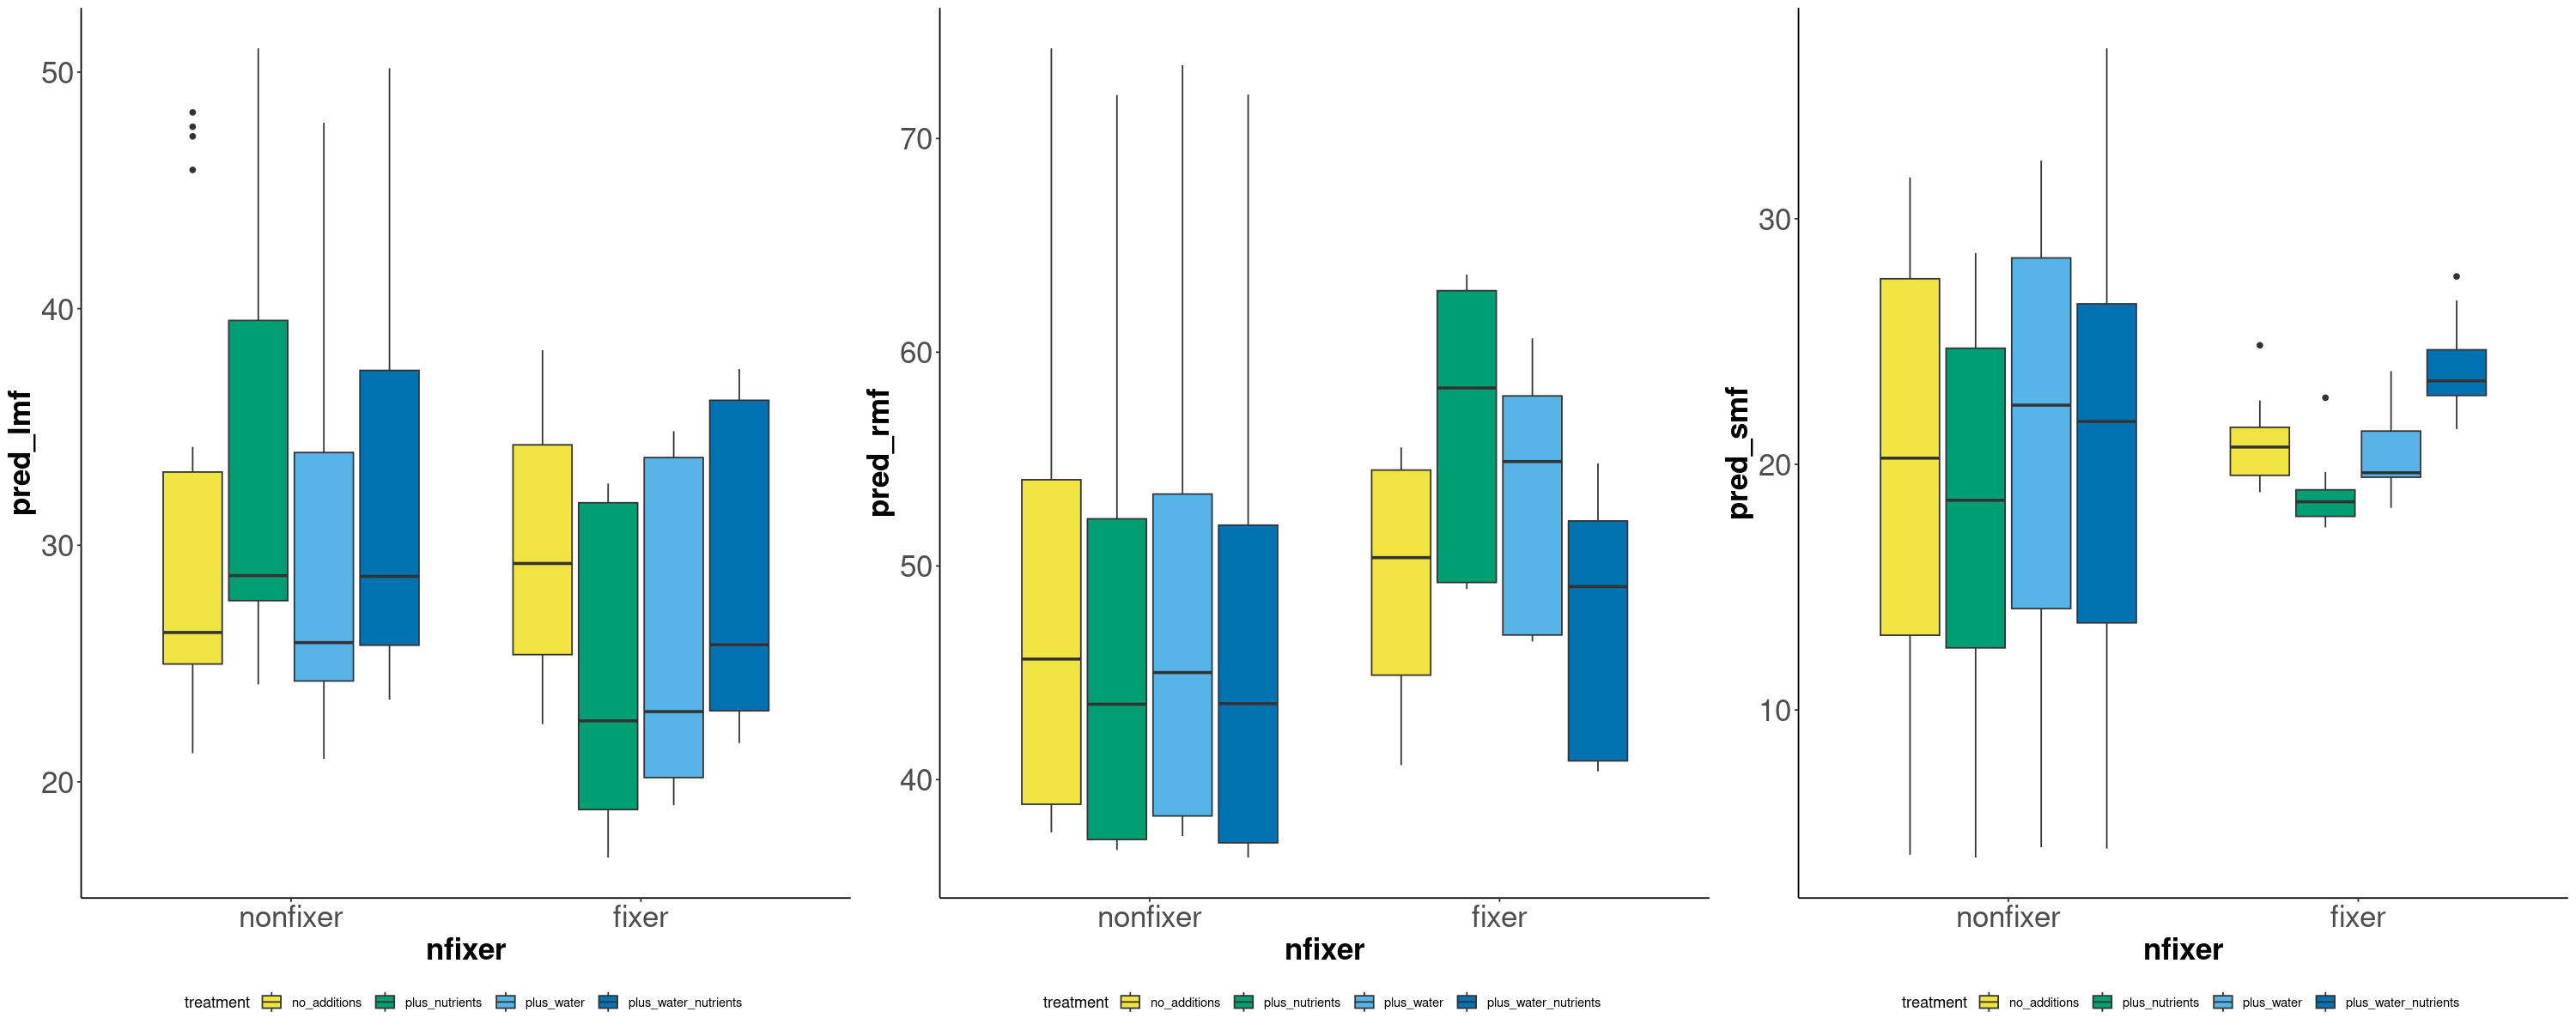

In [154]:
vars_mass_fractions %>%
      # Gererate plots
      pmap( ~ boxplot_plot_pmap(data = data_pred_mass_fractions,
                                y = !!sym(..1), x = !!sym(..2),
                                fill = !!sym(..3))) %>%
      cowplot::plot_grid(plotlist = ., ncol = 3)
